In [20]:
import sys
import pickle
from os import path
import numpy as np
from sklearn import svm
from sklearn import metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
df = pd.read_csv(path.join('2015_core', 'train_set.csv'))
y_train =df.iloc[:, 1:2]
x_train = df.iloc[:, 2:]

In [22]:
# PCA decompisition
n_components = 400
pca = PCA(n_components=n_components)
pca.fit(x_train)


PCA(copy=True, iterated_power='auto', n_components=400, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

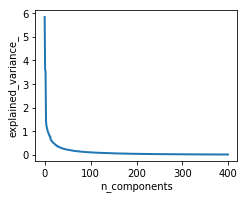

In [23]:
# PCA plot
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.show()

In [24]:
print(pca.explained_variance_)

[5.84704698e+00 3.62164305e+00 3.50600028e+00 1.41589986e+00
 1.21721246e+00 1.13382138e+00 1.04657240e+00 9.73185873e-01
 9.25395562e-01 8.78617030e-01 8.16819403e-01 7.79097810e-01
 7.77057337e-01 6.51116519e-01 6.12745686e-01 5.82100704e-01
 5.72596556e-01 5.38493494e-01 5.11830237e-01 4.97479860e-01
 4.88445619e-01 4.68617198e-01 4.42484821e-01 4.27412993e-01
 4.01231961e-01 3.99698926e-01 3.84947216e-01 3.53529949e-01
 3.50549405e-01 3.45793777e-01 3.37419101e-01 3.35899373e-01
 3.11854253e-01 3.08263374e-01 2.89632073e-01 2.85894403e-01
 2.84692180e-01 2.81844771e-01 2.66056812e-01 2.59372555e-01
 2.53964463e-01 2.46658077e-01 2.42285054e-01 2.39850759e-01
 2.36911771e-01 2.28858179e-01 2.23753390e-01 2.16120235e-01
 2.12402329e-01 2.10609637e-01 2.07376961e-01 2.02684757e-01
 1.99749163e-01 1.97517713e-01 1.90953287e-01 1.87323975e-01
 1.81455524e-01 1.78829457e-01 1.74971606e-01 1.67013108e-01
 1.65881366e-01 1.62900540e-01 1.62418663e-01 1.59364905e-01
 1.56773869e-01 1.543772

In [25]:
x_pca = PCA(n_components=100).fit_transform(x_train)
y_train = y_train.values.flatten().tolist()
print(x_pca)
print(y_train)

[[ 1.32449248e+00  1.09177483e+00 -1.65333994e+00 ... -9.55064816e-03
   2.79675323e-01 -2.07056178e-01]
 [-1.18633499e+00  4.57428787e-01 -1.56409302e+00 ...  3.97663743e-01
   2.68599841e-04 -1.30821060e-01]
 [-9.20865016e-02  1.15490543e+00 -1.16055732e+00 ... -1.50835742e-01
   1.73367851e-01 -1.38115135e-01]
 ...
 [ 1.14795773e+00  2.44678822e-01  5.58958791e-01 ... -7.25571301e-02
  -5.94224825e-01 -1.58862868e-01]
 [ 1.39496431e+00  1.84546564e-01  3.67211118e+00 ...  2.32762731e-01
  -6.14596540e-02  5.55986648e-02]
 [ 1.68712941e+00  1.05774329e+00 -2.49936246e+00 ...  9.60692375e-01
  -1.09273634e-01  1.82813991e+00]]
[0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, -1, -1, -1, -1, 1, 1, 1, 0, 1, 1, -1, 1, 1, -1, 1, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 0, 0, -1, -1, 0, 0, -1, 0, 1, 0, 0, -1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [70]:
clf = svm.SVC(C=2,decision_function_shape='ovr')
print('Strat training muti-class svm classifier...')
clf.fit(x_pca, y_train)
print("Training is done.")
svm_model = path.join('2015_core','model', 'svm.model')
print("Saving model to {}...".format(svm_model))
with open(svm_model, 'wb') as f:
    pickle.dump(clf, f)
print("Saving model done.")

Strat training muti-class svm classifier...
Training is done.
Saving model to 2015_core\model\svm.model...
Saving model done.


In [71]:
print('Test training accuracy: %2f' % clf.score(x_pca, y_train))

Test training accuracy: 0.672945


In [13]:
two_y = [0 if y == -1 else y for y in y_train]
two_clf = svm.SVC(C = 4, probability=True)
print('Strat training 2-class svm classifier...')
two_clf.fit(x_pca, two_y)
print("Training is done.")
svm_model = path.join('2015_core','model', 'svm_two.model')
print("Saving model to {}...".format(svm_model))
with open(svm_model, 'wb') as f:
    pickle.dump(two_clf, f)
print("Saving model done.")
print('Test training accuracy: %2f' % two_clf.score(x_pca, two_y))

Strat training 2-class svm classifier...
Training is done.
Saving model to 2015_core\model\svm_two.model...
Saving model done.
Test training accuracy: 0.820355


In [16]:
lin_clf = svm.LinearSVC()
print('Strat training linear svm classifier...')
lin_clf.fit(x_pca, y_train)
print("Training is done.")
svm_model = path.join('2015_core','model', 'svm_lin.model')
print("Saving model to {}...".format(svm_model))
with open(svm_model, 'wb') as f:
    pickle.dump(two_clf, f)
print("Saving model done.")
print('Test training accuracy: %2f' % two_clf.score(x_pca, y_train))

Strat training linear svm classifier...
Training is done.
Saving model to 2015_core\model\svm_lin.model...
Saving model done.
Test training accuracy: 0.586382


In [66]:
import numpy as np
def predict_score(x_set,y_set,clf):
    result = clf.predict(x_set)
    correct = 1
    for i in range(len(x_set)):
        if result[i] == y_set[i]:
            correct += 1
    return correct/len(x_set)
C_values = np.arange(1, 8.2, .2)
C_values = [round(c,1) for c in C_values]
# train_size = int(len(x_pca)*0.8)
train_size = int(len(x_pca)*0.15)
# x_pca_train = x_pca[:train_size]
# labels_train = y_train[:train_size]
# x_pca_test = x_pca[train_size:]
# labels_test = y_train[train_size:]
x_pca_test = x_pca[:train_size]
labels_test = y_train[:train_size]
svc_accuracy=[]
for c in C_values:
    tmp_clf = svm.SVC(C=c, decision_function_shape='ovr')
    print("training svm for C={}".format(c))
    tmp_clf.fit(x_pca, y_train)
#     tmp_clf.fit(x_pca_train, labels_train)
    accuracy = tmp_clf.score(x_pca_test, labels_test)
#    accuracy = predict_score(x_pca_test, labels_test, tmp_clf)
    print('Test training accuracy: %2f' % accuracy)
    svc_accuracy.append(accuracy)


training svm for C=1.0
Test training accuracy: 0.637681
training svm for C=1.2
Test training accuracy: 0.647343
training svm for C=1.4
Test training accuracy: 0.649758
training svm for C=1.6
Test training accuracy: 0.654589
training svm for C=1.8
Test training accuracy: 0.664251
training svm for C=2.0
Test training accuracy: 0.681159
training svm for C=2.2
Test training accuracy: 0.688406
training svm for C=2.4
Test training accuracy: 0.695652
training svm for C=2.6
Test training accuracy: 0.695652
training svm for C=2.8
Test training accuracy: 0.698068
training svm for C=3.0
Test training accuracy: 0.712560
training svm for C=3.2
Test training accuracy: 0.717391
training svm for C=3.4
Test training accuracy: 0.727053
training svm for C=3.6
Test training accuracy: 0.729469
training svm for C=3.8
Test training accuracy: 0.734300
training svm for C=4.0
Test training accuracy: 0.734300
training svm for C=4.2
Test training accuracy: 0.739130
training svm for C=4.4
Test training accuracy: 0

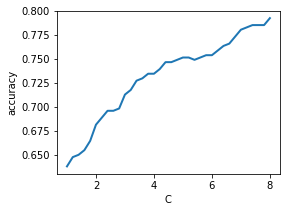

In [67]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(C_values, svc_accuracy, linewidth=2)
plt.axis('tight')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()

In [72]:
rbf_clf = svm.SVC(C=2.0, kernel='rbf', decision_function_shape='ovr',gamma='auto')
rbf_clf.fit(x_pca, y_train)
print(rbf_clf.score(x_pca, y_train))


0.6729445852951829


In [75]:
lin_clf = svm.SVC(C=2.0, kernel='linear', decision_function_shape='ovr')
lin_clf.fit(x_pca,y_train)
print(lin_clf.score(x_pca,y_train))

0.5852951829047447
